<a href="https://colab.research.google.com/github/Anushka-2906/DAI-101/blob/main/23114008_Anushka_Jangid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Anushka-2906/DAI-101/refs/heads/main/Titanic-Dataset.csv'
df = pd.read_csv(url)

# Display first few rows
df.head()


✅ Titanic dataset created as 'titanic.csv'


1.DATA CLEANING

In [22]:

#  Load the dataset
file_path = 'titanic.csv'  # Or path to your file on Google Drive
df = pd.read_csv(file_path)

#  **1. Inspect the Data**
print("\n" + "="*30 + " DATASET INFO " + "="*30)
print(df.info())
print("="*70)

#  **2. Handle Missing Values**
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\n Missing values handled:")
print(f"- Age filled with median value: {df['Age'].median()}")
print(f"- Embarked filled with mode value: {df['Embarked'].mode()[0]}")
print("="*70)

#  **3. Remove Duplicates**
initial_shape = df.shape
df.drop_duplicates(inplace=True)
new_shape = df.shape

print("\n Duplicates removed:")
print(f"- Initial shape: {initial_shape}")
print(f"- After removing duplicates: {new_shape}")
print("="*70)

#  **4. Treat Outliers using IQR (for Fare)**
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

before_outliers = df.shape[0]
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
after_outliers = df.shape[0]

print("\n Outliers treated:")
print(f"- Fare lower bound: {lower_bound:.2f}")
print(f"- Fare upper bound: {upper_bound:.2f}")
print(f"- Rows before removing outliers: {before_outliers}")
print(f"- Rows after removing outliers: {after_outliers}")
print("="*70)

#  **5. Standardize Categorical Values**
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

print("\n Categorical values standardized:")
print(f"- Unique values in 'Sex': {df['Sex'].unique()}")
print(f"- Unique values in 'Embarked': {df['Embarked'].unique()}")
print("="*70)

# 🏆 **6. Display Cleaned Data**
print("\n" + "="*30 + " CLEANED DATA (Top 5 Rows) " + "="*30)
print(df.head())
print("="*70)



============================== DATASET INFO ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Missing values handled:
- Age filled with median value: 28.0
- Embarked filled with mode value: S

 Duplicates removed:
- Initial shape: (891, 12)
- After removi

 2. EXPLORATORY DATA ANALYSIS (EDA):

 Univariate Analysis (Single-Variable Exploration)


============================== SUMMARY STATISTICS ==============================
       PassengerId    Survived     Pclass         Age       SibSp       Parch  \
count   775.000000  775.000000  775.00000  775.000000  775.000000  775.000000   
mean    445.806452    0.339355    2.48000   28.748710    0.437419    0.340645   
std     260.116285    0.473796    0.73439   12.782123    0.899838    0.785914   
min       1.000000    0.000000    1.00000    0.420000    0.000000    0.000000   
25%     213.500000    0.000000    2.00000   22.000000    0.000000    0.000000   
50%     450.000000    0.000000    3.00000   28.000000    0.000000    0.000000   
75%     670.500000    1.000000    3.00000   34.000000    1.000000    0.000000   
max     891.000000    1.000000    3.00000   80.000000    5.000000    6.000000   

             Fare  
count  775.000000  
mean    17.822091  
std     13.578085  
min      0.000000  
25%      7.895800  
50%     13.000000  
75%     26.000000  
max     65.000000  


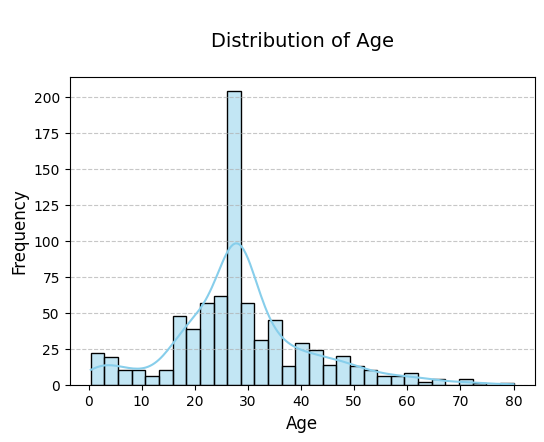

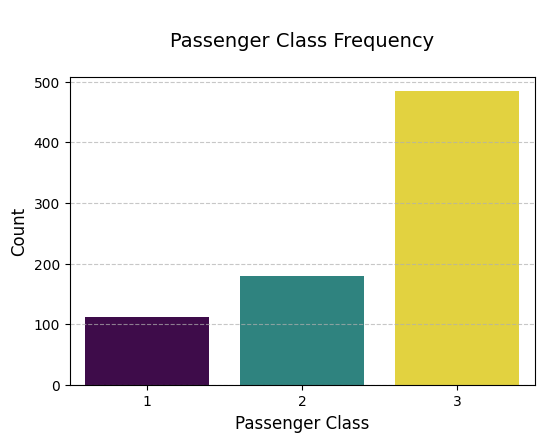

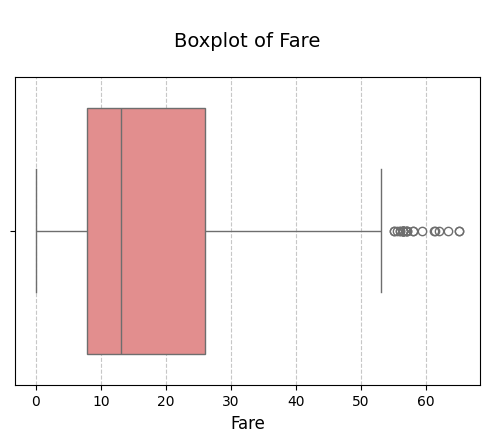

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#  **1. Summary Statistics**
print("\n" + "="*30 + " SUMMARY STATISTICS " + "="*30)
print(df.describe())
print("="*70)

#  **2. Histogram for Age**
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('\nDistribution of Age\n', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  **3. Frequency Distribution for Passenger Class** (Fixed)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df, hue='Pclass', palette='viridis', legend=False)
plt.title('\nPassenger Class Frequency\n', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  **4. Boxplot for Fare**
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Fare'], color='lightcoral')
plt.title('\nBoxplot of Fare\n', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


 Bivariate Analysis (Two-Variable Exploration)

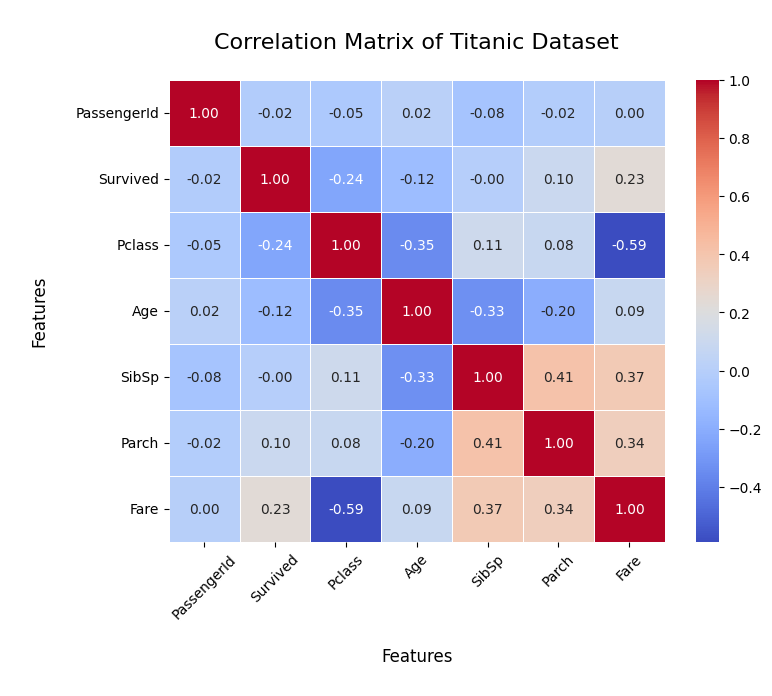

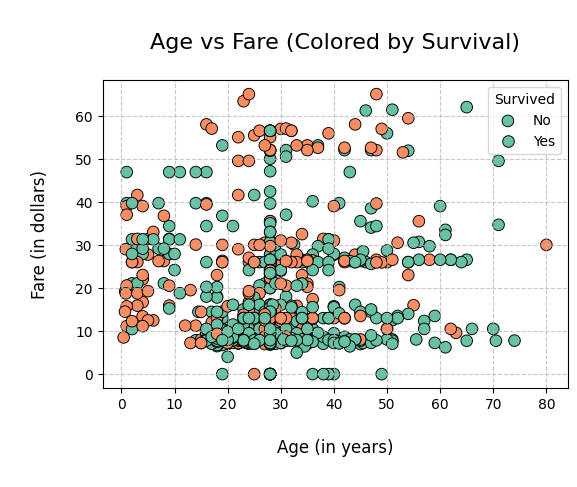

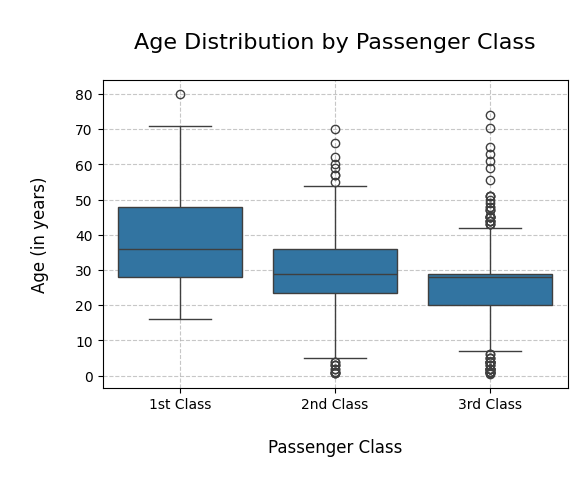

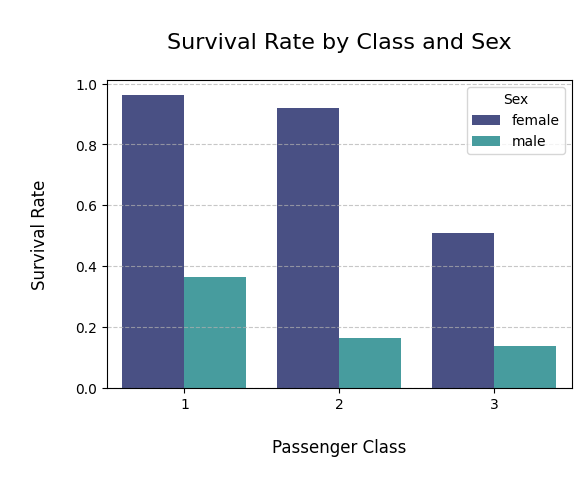

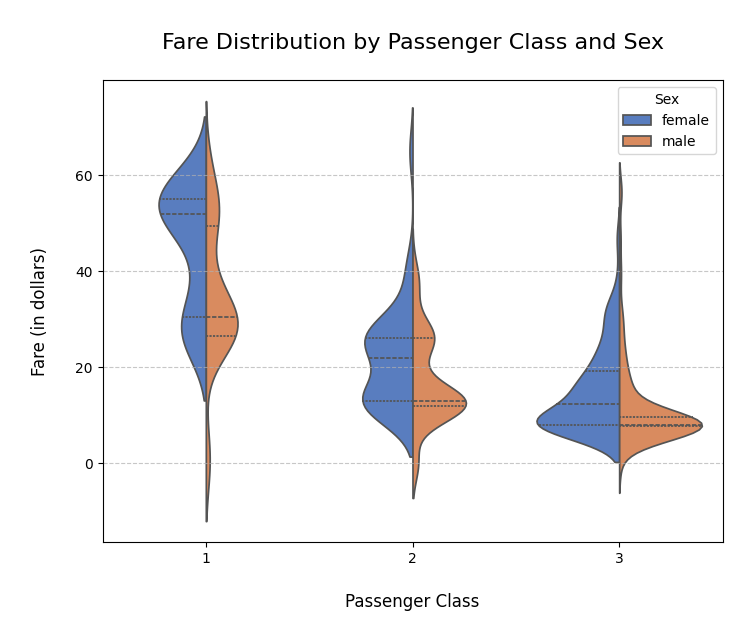

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Handle missing values correctly
df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Fare=df['Fare'].fillna(df['Fare'].median())
)

#  Convert data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# ===================================================
#  **1. Correlation Matrix**
# ===================================================
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('\nCorrelation Matrix of Titanic Dataset\n', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('\nFeatures\n', fontsize=12)
plt.ylabel('\nFeatures\n', fontsize=12)
plt.show()

# ===================================================
#  **2. Scatter Plot (Age vs Fare)**
# ===================================================
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=df,
    palette='Set2',
    s=70,
    edgecolor='black'
)
plt.title('\nAge vs Fare (Colored by Survival)\n', fontsize=16)
plt.xlabel('\nAge (in years)\n', fontsize=12)
plt.ylabel('\nFare (in dollars)\n', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# ===================================================
#  **3. Box Plot (Pclass vs Age)**
# ===================================================
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Pclass',
    y='Age',
    data=df  # Removed palette to avoid warning
)
plt.title('\nAge Distribution by Passenger Class\n', fontsize=16)
plt.xlabel('\nPassenger Class\n', fontsize=12)
plt.ylabel('\nAge (in years)\n', fontsize=12)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# ===================================================
#  **4. Bar Plot (Survival by Pclass and Sex)**
# ===================================================
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=df,
    palette='mako',
    errorbar=None
)
plt.title('\nSurvival Rate by Class and Sex\n', fontsize=16)
plt.xlabel('\nPassenger Class\n', fontsize=12)
plt.ylabel('\nSurvival Rate\n', fontsize=12)
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ===================================================
#  **5. Violin Plot (Fare by Pclass and Sex)**
# ===================================================
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='Pclass',
    y='Fare',
    hue='Sex',
    data=df,
    split=True,
    inner='quartile',
    palette='muted'
)
plt.title('\nFare Distribution by Passenger Class and Sex\n', fontsize=16)
plt.xlabel('\nPassenger Class\n', fontsize=12)
plt.ylabel('\nFare (in dollars)\n', fontsize=12)
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 Multivariate Analysis (Multiple Variables Exploration)

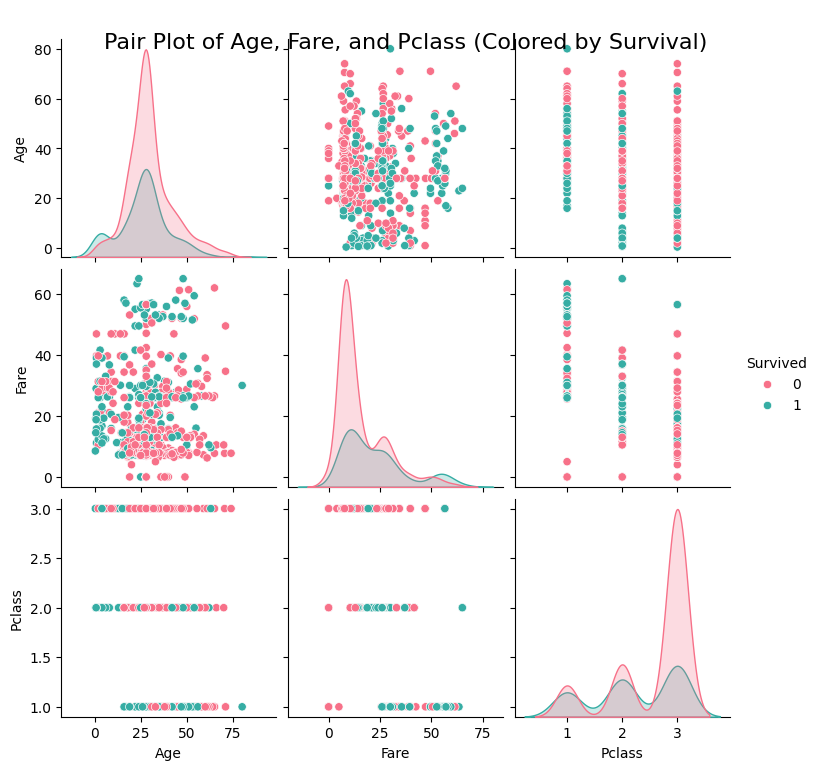

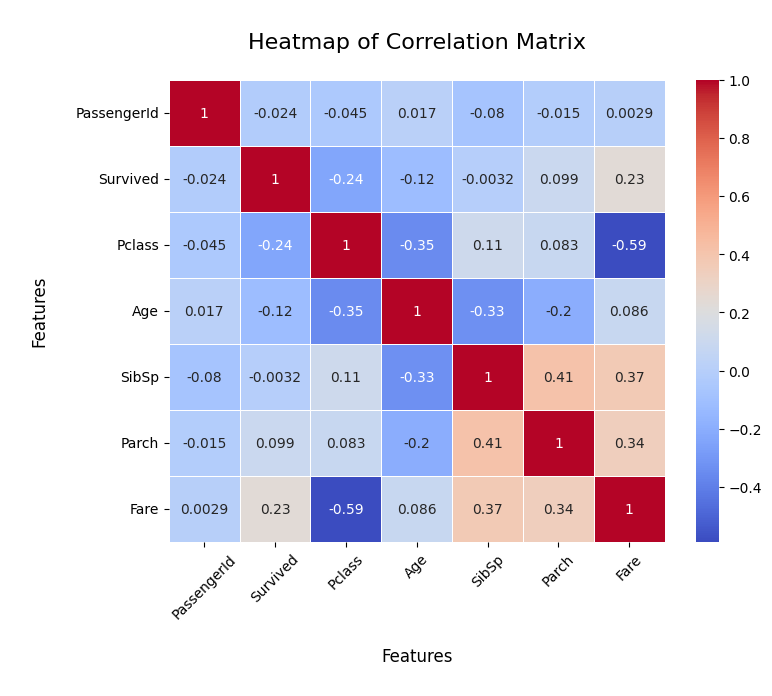

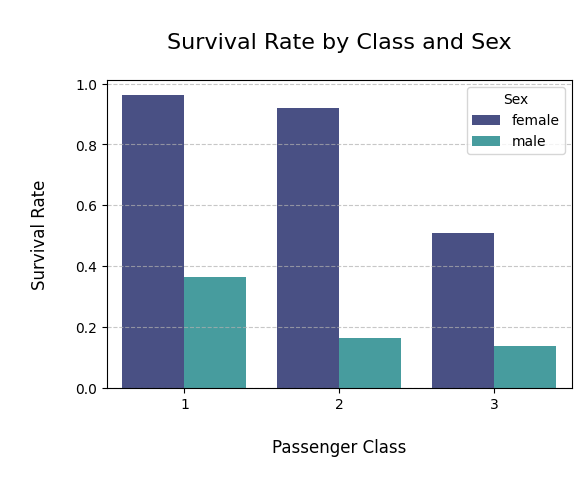

In [18]:
#@title
#  Handle missing values
df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Fare=df['Fare'].fillna(df['Fare'].median())
)

#  Convert data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# ===================================================
#  **1. Pair Plot (Survived as Hue)**
# ===================================================
sns.pairplot(
    df[['Age', 'Fare', 'Pclass', 'Survived']],
    hue='Survived',
    palette='husl',
    diag_kind='kde'
)
plt.suptitle('\nPair Plot of Age, Fare, and Pclass (Colored by Survival)\n', y=1.02, fontsize=16)
plt.show()

# ===================================================
#  **2. Heatmap of Correlations**
# ===================================================
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('\nHeatmap of Correlation Matrix\n', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('\nFeatures\n', fontsize=12)
plt.ylabel('\nFeatures\n', fontsize=12)
plt.show()

# ===================================================
#  **3. Grouped Bar Plot (Survival Rate by Class and Sex)**
# ===================================================
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=df,
    palette='mako',
    errorbar=None
)
plt.title('\nSurvival Rate by Class and Sex\n', fontsize=16)
plt.xlabel('\nPassenger Class\n', fontsize=12)
plt.ylabel('\nSurvival Rate\n', fontsize=12)
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()